# Exercice 7

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as pt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
df=pd.read_csv("Advertising.csv")
y=df.Sales
X=df[['TV', 'Radio', 'Newspaper']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=12)

In [44]:
lr=0.00001
n_iters=10000
weights=None
bias=None
def fit(X,y):
     n_samples,n_features=X.shape #(n,m)
     weights=np.zeros(n_features) # (m,)
     mse=[]
     bias=0
     for _ in range(n_iters):
         y_predicted=np.dot(X,weights) + bias
         mse.append(metrics.mean_squared_error(y,y_predicted))
         dw=(2/n_samples)*np.dot(X.T,y_predicted-y)
         db=(2/n_samples)*np.sum(y_predicted-y)
         weights-=lr*dw
         bias-=lr*db
     return bias,weights,mse

In [45]:
b,w,mse=fit(X_train,y_train)
b,w,mse[-1] #bais, weights, last error

(0.08546065951789071,
 array([0.05278809, 0.22368423, 0.01739528]),
 4.029631286020369)

In [46]:
def predict(X):
 predicted_y=np.dot(X,w)+b
 return predicted_y

In [47]:
predictions=predict(X_test)
predictions

array([16.37300183,  4.84379128,  5.91188002, 14.1669323 , 12.27397128,
       16.85706667, 24.38182743,  6.07384786,  9.65431774, 11.01658546,
       16.69438795, 10.78579295,  6.6496218 , 14.34281726, 25.73065208,
        8.50537338, 10.60879956, 13.83439774, 13.30418421, 15.54277959,
       21.33612578,  9.81663258, 25.60677218,  6.66557816, 15.94386937,
        7.59537672, 12.50266447, 11.72741041,  1.31177745, 10.3222969 ,
        8.10097496, 26.13471876, 15.97524316, 22.75214591,  4.18622666,
       19.69528859, 11.37016789, 22.6787298 , 12.00984803, 12.78752174])

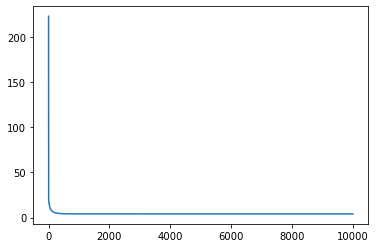

In [48]:
pt.plot(np.arange(10000),mse)

In [49]:
X=np.array(X)
y=np.array(y)
h=LinearRegression()
h.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred=h.predict(X_test)
y_pred

array([16.39007308,  6.55142872,  7.75824723, 14.53202646, 13.33028039,
       17.25724194, 22.70246331,  7.56542867, 11.11617935, 12.16590506,
       16.20688599, 11.89552242,  8.6982841 , 14.33284955, 23.90604787,
        9.90237465, 11.29089546, 12.63485551, 13.73025584, 14.93273641,
       20.82213372, 11.03622634, 22.81579474,  7.85544991, 16.34325529,
        9.39298831, 13.20801647, 11.595813  ,  3.62943523, 11.70631855,
        9.12735107, 23.85164956, 16.31341962, 20.96174927,  6.14548653,
       19.77913484, 12.30781253, 21.19176851, 12.43898029, 12.55735255])

In [51]:
mse=metrics.mean_squared_error(y_test,y_pred)
mse

2.813241103782835